1\. Write a function that converts number representation (bin<->dec<->hex)

In [12]:
def to_base(x, base1, base2):
    """
    Converts x from base1 to base2
    parameters:
        x: string if base1 is hex or bin, int if base1 is dec
        base1: 'dec', 'hex' or 'bin' starting base
        base2: 'dec', 'hex' or 'bin' final base
    """
    if base1 != 'dec' and base1 != 'bin' and base1 != 'hex':
        raise ValueError ("Invalid initial base")
    if base2 != 'dec' and base2 != 'bin' and base2 != 'hex':
        raise ValueError ("Invalid final base")
        
    # from any to decimal 
    if base1 == 'bin':
        bin_num = list(x.strip(" ")) #convert to list
        bin_num = [int(bin_num[i]) for i in range(2, len(bin_num))]
        bin_num.reverse()
        dec_num = 0
        i = 0
        for c in bin_num:
            dec_num+=2**i*int(c)
            i+=1 
    elif base1 == 'hex':
        hex_num = list(x.strip(" ")) #convert to list
        hex_num = [int(hex_num[i]) for i in range(2, len(hex_num))]
        hex_num.reverse()
        dec_num = 0
        i = 0
        for c in hex_num:
            dec_num+=16**i*int(c)
            i+=1 
    else: dec_num = x

    if base2 == 'dec': return dec_num

    # from decimal to any 
    if base2 == 'bin':
        r = []
        div = int(dec_num/2)
        r.append(dec_num%2)
        while div !=0:
            dec_num = div
            div = int(dec_num/2)
            r.append(dec_num%2)
        r.reverse()
        r = ''.join([str(u) for u in r])
    elif base2 == 'hex':
        r = []
        div = int(dec_num/16)
        r.append(dec_num%16)
        while div !=0:
            dec_num = div
            div = int(dec_num/16)
            r.append(dec_num%16)
        r.reverse()
        r = ''.join([str(u) for u in r])
        for y in r:
            if y == 10: y = 'a'
            elif y == 11: y = 'b'
            elif y == 12: y = 'c'
            elif y == 13: y = 'd'
            elif y == 14: y = 'e'
            elif y == 15: y = 'f'
    return r
    

In [13]:
a = 23
abin = bin(a)
ahex = hex(a)
print('dec: ', a, ' bin: ', abin, ' hex: ', ahex)
print('\ndecimal->binary of ', a, ':', to_base(a, 'dec', 'bin'))
print('decimal->hex of ', a, ':', to_base(a, 'dec', 'hex'))
print('bin->dec of ', abin, ':', to_base(abin, 'bin', 'dec'))
print('bin->hex of ', abin, ':', to_base(abin, 'bin', 'hex'))
print('hex->dec of ', ahex, ':', to_base(ahex, 'hex', 'dec'))
print('hex->bin of ', ahex, ':', to_base(ahex, 'hex', 'bin'))

dec:  23  bin:  0b10111  hex:  0x17

decimal->binary of  23 : 10111
decimal->hex of  23 : 17
bin->dec of  0b10111 : 23
bin->hex of  0b10111 : 17
hex->dec of  0x17 : 23
hex->bin of  0x17 : 10111


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [14]:
def to_float (s):
    sign = int(s[0],2)
    ex = int(s[1:9],2)
    man = s[9:]
    bias = 127
    i=23
    sum=0
    for m in man:
        sum+=int(m)*2**(-i)
        i-=1
    x = (-1)**sign*(1+sum)*2**(ex-bias)
    return x

e = '10000001'
s = '1'
m = '00000000000000000000110'
y = s+e+m
to_float (y)

-5.5

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [15]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [16]:
uf = 1.
of = 1.
uf_flag, of_flag = False, False

while uf_flag == False:
    old = uf
    uf=uf/2.
    if uf == 0:
        print ('Underflow achieved at ', old)
        uf_flag= True

Underflow achieved at  5e-324


In [17]:
while of_flag == False:
    old=of
    of=of*2.
    if of == float('inf'):
        print ('Overflow achieved at ', old)
        of_flag = True

Overflow achieved at  8.98846567431158e+307


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [18]:
eps = 1
while eps + 1 != 1:
    eps = eps / 1.000001
print(eps)

1.1102229592290195e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [19]:
a = 0.001
b = 1000
c = 0.001
import numpy as np

# b
def standard_formula(a,b,c):
    x1= (-b + np.sqrt(b**2-4*a*c))/(2*a)
    x2= (-b - np.sqrt(b**2-4*a*c))/(2*a)
    return x1, x2
# b
def weird_formula(a,b,c):
    x1= (2*c)/(-b+np.sqrt(b**2-4*a*c))
    x2= (2*c)/(-b-np.sqrt(b**2-4*a*c))
    return x1, x2

# c
def stable_formula(a,b,c):
    x1= (-b-np.sign(b)*np.sqrt(b**2-4*a*c))/(2*a)
    x2= c/(a*x1)
    return x1, x2

print('standard: ', standard_formula(a,b,c))
print('second strategy ', weird_formula(a,b,c))
print('stable', stable_formula(a,b,c))


standard:  (-9.999894245993346e-07, -999999.999999)
second strategy  (-1000010.5755125057, -1.000000000001e-06)
stable (-999999.999999, -1.000000000001e-06)


The numerical error is due to the represetation of floats introduced by multiplication


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [20]:
def f(x):
    return x*(x-1)

delta = 1e-4
x0=1

# a real forumula
def def_formula(f, x0, delta):
    return (f(x0+delta)-f(x0))/delta

print(def_formula(f, 0.5, delta))

9.999999994736442e-05


Text(0.5, 0, '$\\log_{10}\\delta$')

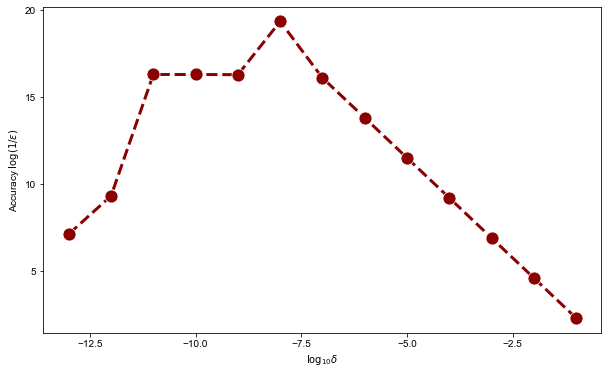

In [21]:
delta = [10**(-i) for i in range (1,14)]
realx = 1.
x0 = 1.
acc = [np.log(1/abs(realx-def_formula(f, x0, d))) for d in delta]

import seaborn as sns
from matplotlib.pylab import plt
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(palette='Dark2',font_scale=2.5)
lw=3
ms=13
ls='--'
sns.lineplot(x=np.log10(delta), y=acc, ax=ax,marker='o', markersize=ms,linewidth=lw, 
            linestyle=ls, color ='darkred')
ax.set_ylabel(r"Accuracy $\log(1/\epsilon)$")
ax.set_xlabel(r"$\log_{10}\delta$")



7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [22]:
def riemann_integral(f, N, x1, x2):
    import time
    init = time.time()

    #integral
    h = abs(x2-x1)/N
    if x2>x1:
        signum = 1
    else: 
        signum = -1
        x2, x1 = x1, x2
    y = [f(x) for x in np.linspace(x1, x2, N)]
    int = [f*h for f in y]
    
    stop = time.time()
    return sum(int)*signum, stop-init

In [27]:
def f_test(x):
    return np.sqrt(1-x**2)
print('integral test (integral, time): ',riemann_integral(f_test, N=100, x1=-1, x2=1))
print('accuracy: ',np.log(1/np.abs(riemann_integral(f_test, N=100, x1=-1, x2=1)[0]-np.pi/2)))

integral test (integral, time):  (1.5534179294048955, 0.0004050731658935547)
accuracy:  4.052527373407944


In [24]:
# to run in less than a second
N=100
i, time = riemann_integral(f_test, N, x1=-1, x2=1)
while time < 1:
    N=N*2
    i, time = riemann_integral(f_test, N, x1=-1, x2=1)
print("maximum N for less then a second simulation: ", N)

maximum N for less then a second simulation:  819200


In [25]:
N = [10**(i) for i in range (1,8)]
realint = np.pi/2
time = []
acc = []
for n in N:
    i, t = riemann_integral(f_test, n, x1=-1, x2=1)
    time.append(t)
    acc.append(np.log(1/(abs(realint-i))))

Text(0.5, 0, 'N')

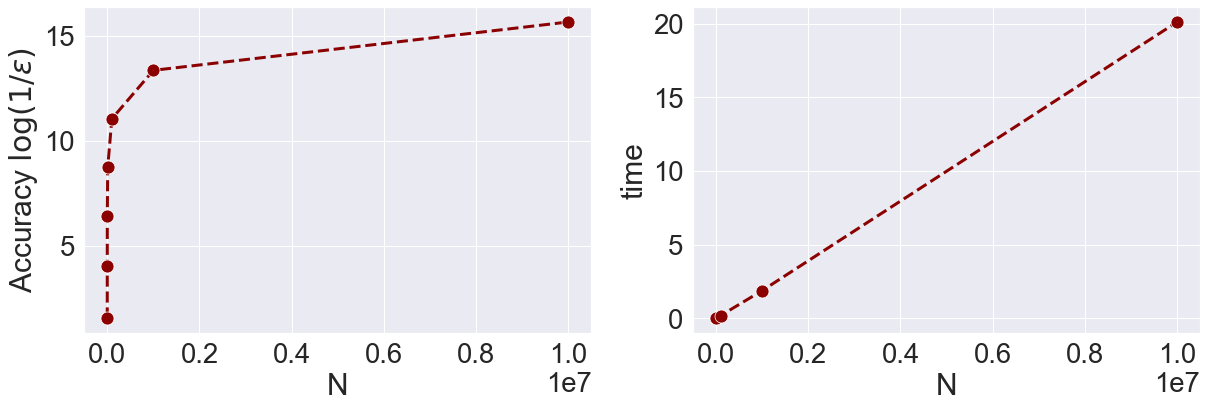

In [26]:
fig,ax=plt.subplots(ncols = 2, nrows = 1, figsize=(20,6))
sns.set_theme(palette='Dark2',font_scale=2.5)
lw=3
ms=13
ls='--'
sns.lineplot(x=N, y=acc, ax=ax[0],marker='o', markersize=ms,linewidth=lw, 
            linestyle=ls, color ='darkred')
ax[0].set_ylabel(r"Accuracy $\log(1/\epsilon)$")
ax[0].set_xlabel(r"N")

sns.lineplot(x=N, y=time, ax=ax[1],marker='o', markersize=ms,linewidth=lw, 
            linestyle=ls, color ='darkred')
ax[1].set_ylabel(r"time")
ax[1].set_xlabel(r"N")
